In [4]:
import os
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import nltk
nltk.downloader.download('vader_lexicon')
import re
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [242]:
df = pd.read_csv('E:/stock/result.csv')


In [243]:
df['Date']

0          04-01-2010
1          05-01-2010
2          06-01-2010
3          07-01-2010
4          08-01-2010
              ...    
2117114    29-12-2016
2117115    30-12-2016
2117116          Date
2117117          Date
2117118          Date
Name: Date, Length: 2117119, dtype: object

In [244]:
df.set_index('Date', inplace= True)

In [245]:
df['Close'] = np.where(df['Close'].str.contains('Close'), 0, df['Close'])
df['Subjectivity'] = np.where(df['Subjectivity'].str.contains('Subjectivity'), 0, df['Subjectivity'])
df['Polarity'] = np.where(df['Polarity'].str.contains('Polarity'), 0, df['Polarity'])
df['Compound'] = np.where(df['Compound'].str.contains('Compound'), 0, df['Compound'])
df['Negative'] = np.where(df['Negative'].str.contains('Negative'), 0, df['Negative'])
df['Positive'] = np.where(df['Positive'].str.contains('Positive'), 0, df['Positive'])
df['Neutral'] = np.where(df['Neutral'].str.contains('Neutral'), 0, df['Neutral'])


In [246]:
df_final = df[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive']]
df_final

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
Date,,,,,,,
04-01-2010,69.219017,0.0,0.0,0.0,0.0,1.0,0.0
05-01-2010,70.82074,0.0,0.0,0.0,0.0,1.0,0.0
06-01-2010,77.810081,0.0,0.0,0.0,0.0,1.0,0.0
07-01-2010,74.598969,0.0,0.0,0.0,0.0,1.0,0.0
08-01-2010,75.541611,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
29-12-2016,177.131287,0.0,0.0,0.0,0.0,1.0,0.0
30-12-2016,177.918793,0.0,0.0,0.0,0.0,1.0,0.0
Date,0,0,0,0,0,0,0


In [247]:
df['Polarity'].dtype

dtype('O')

In [248]:
df['Polarity']=pd.to_numeric(df['Polarity'])
df['Subjectivity']=pd.to_numeric(df['Subjectivity'])

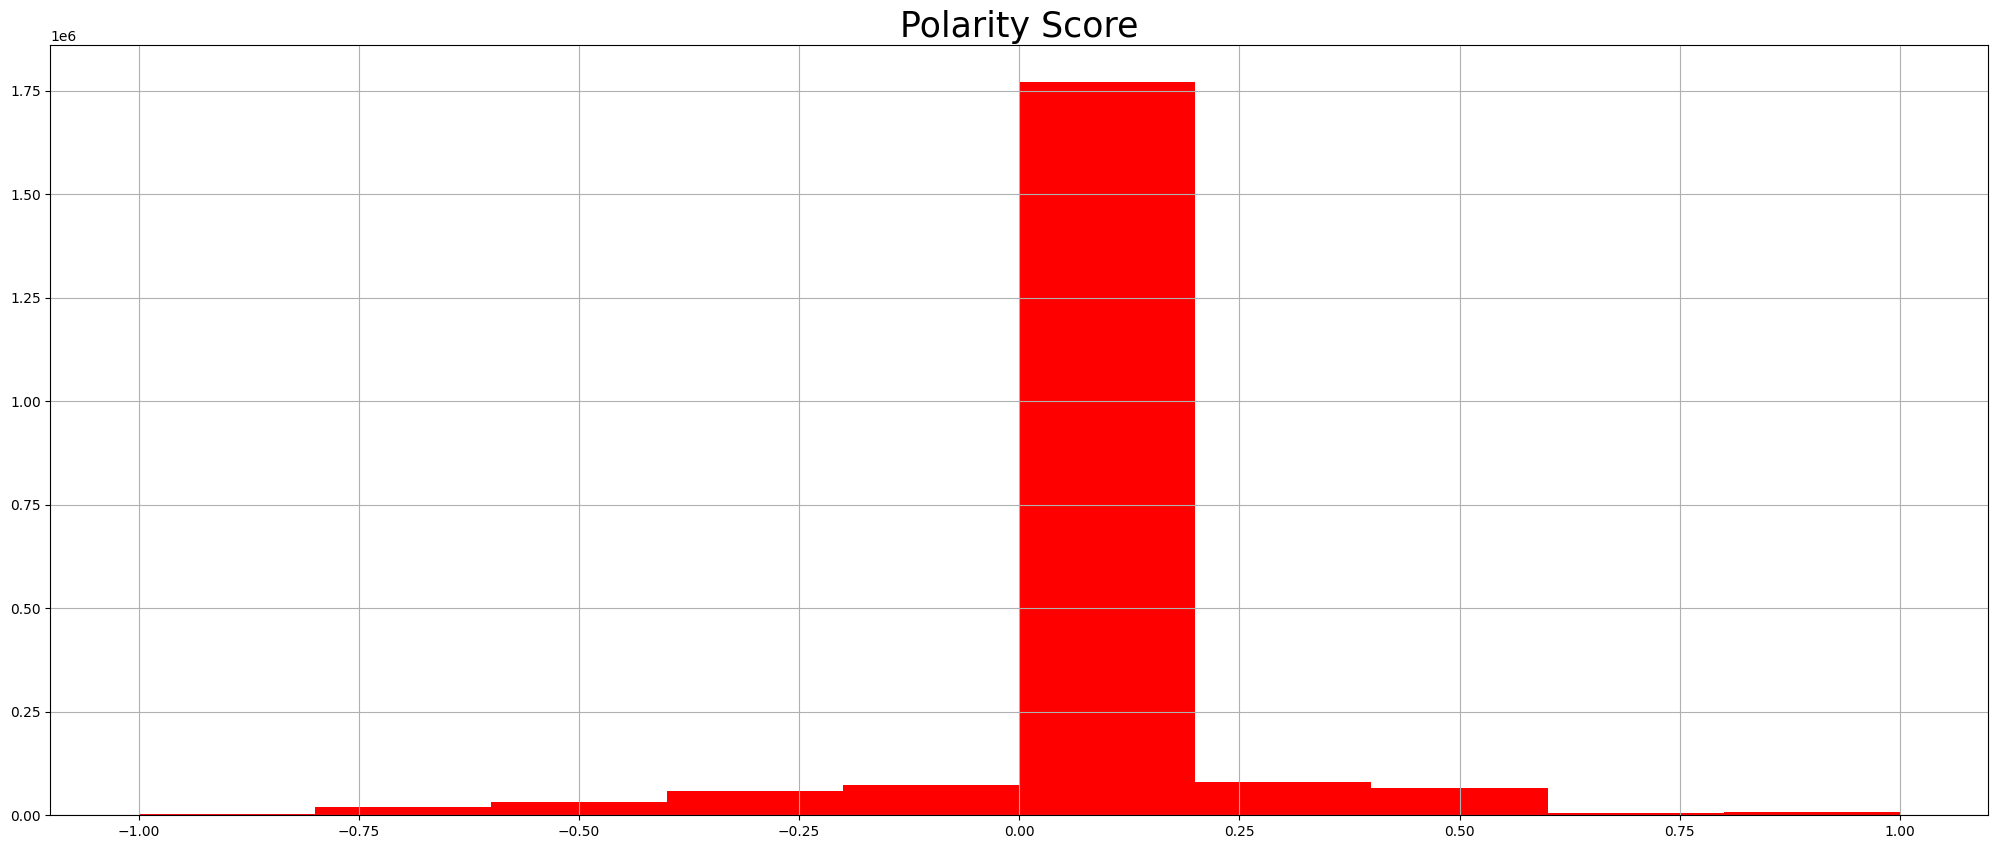

In [249]:
plt.figure(figsize=(25,10))
df['Polarity'].hist(color='red')
plt.title("Polarity Score",fontsize=25)
plt.show()

Text(0.5, 1.0, 'Subjectivity Score')

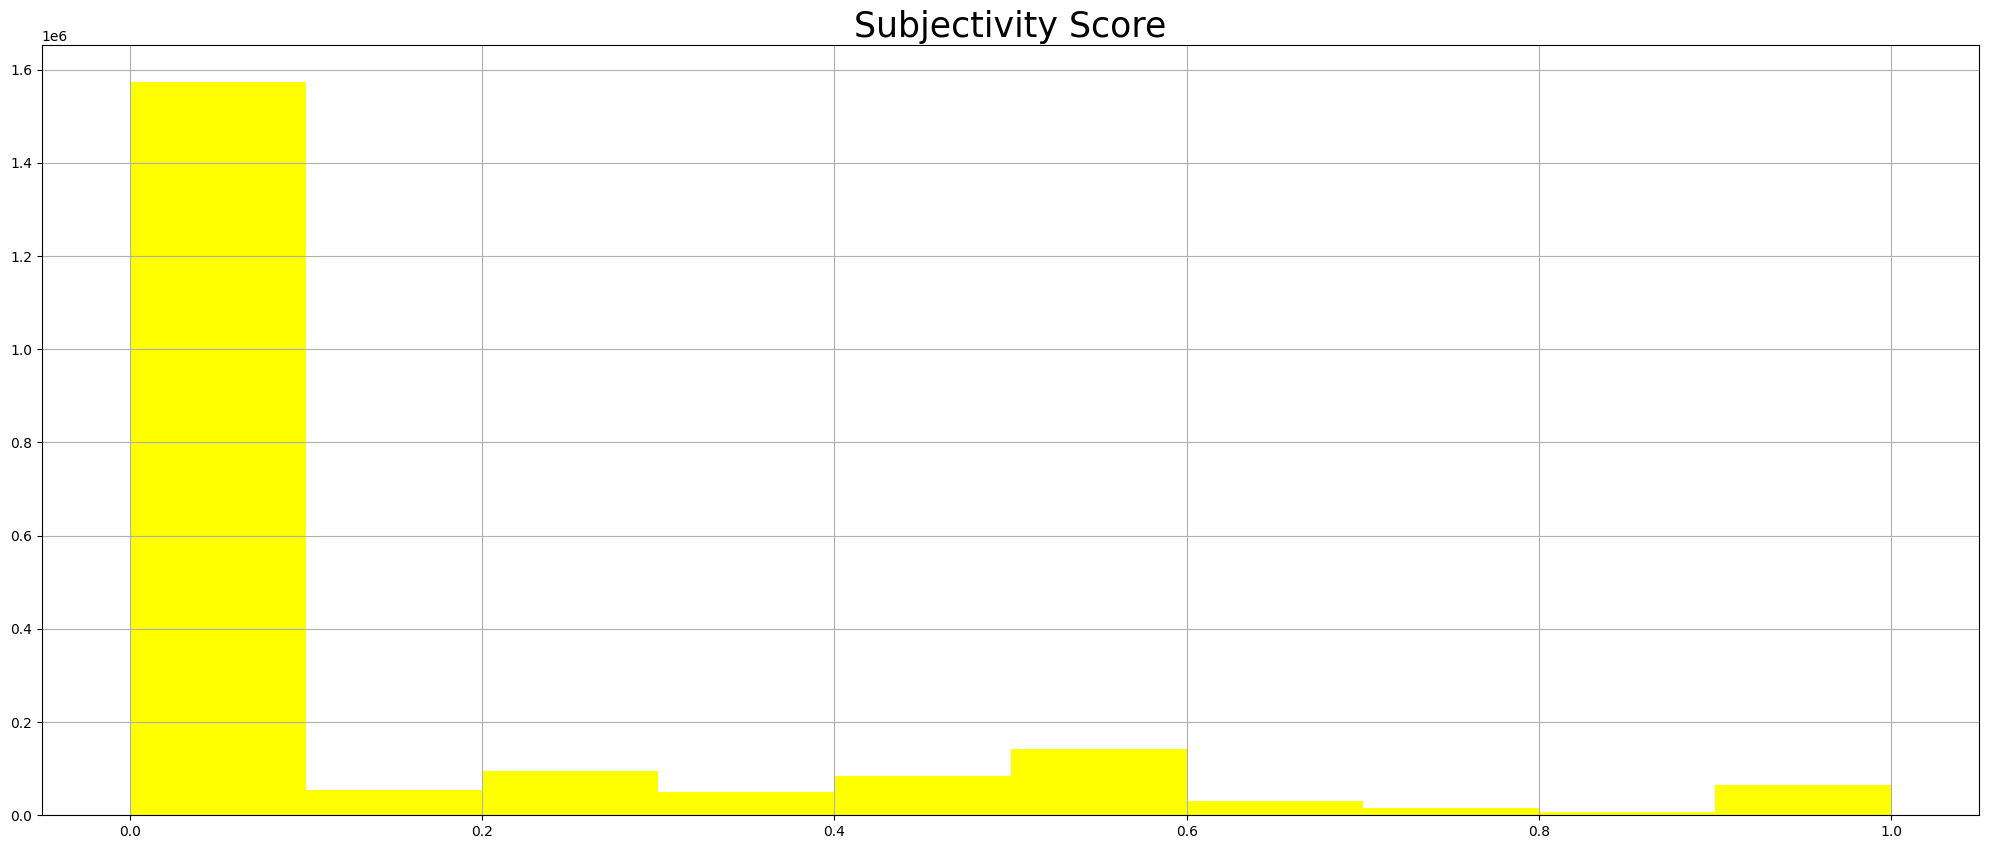

In [250]:
plt.figure(figsize=(25,10))
df['Subjectivity'].hist(color='yellow')
plt.title("Subjectivity Score",fontsize=25)

In [251]:
scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df_final))
df_scaled.columns = df_final.columns
df_scaled.index = df_final.index
df_scaled.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
Date,,,,,,,
04-01-2010,0.040990,0.0,0.5,0.499088,0.0,1.0,0.0
05-01-2010,0.041938,0.0,0.5,0.499088,0.0,1.0,0.0
06-01-2010,0.046077,0.0,0.5,0.499088,0.0,1.0,0.0
07-01-2010,0.044175,0.0,0.5,0.499088,0.0,1.0,0.0
08-01-2010,0.044734,0.0,0.5,0.499088,0.0,1.0,0.0


In [253]:
df['Open'] = np.where(df['Open'].str.contains('Open'), 0, df['Open'])
df['High'] = np.where(df['High'].str.contains('High'), 0, df['High'])
df['Low'] = np.where(df['Low'].str.contains('Low'), 0, df['Low'])
df['Volume'] = np.where(df['Volume'].str.contains('Volume'), 0, df['Volume'])
df['Adj Close'] = np.where(df['Adj Close'].str.contains('Adj Close'), 0, df['Adj Close'])

In [254]:
columns = ['Open','High','Low','Volume','Adj Close']

In [255]:
X=df[columns]

In [256]:
X

,Open,High,Low,Volume,Adj Close
Date,,,,,
04-01-2010,67.011856,69.586876,66.368103,1860224.0,57.296196
05-01-2010,69.433601,71.111961,69.433601,2280286.0,58.622021
06-01-2010,70.966354,79.243202,70.506531,7326390.0,64.407463
07-01-2010,79.611069,79.611069,74.031853,4759208.0,61.749454
08-01-2010,75.07412,77.863731,73.909233,3324076.0,62.529728
...,...,...,...,...,...
29-12-2016,175.875046,178.875046,174.018799,5453945.0,172.046417
30-12-2016,177.61879,178.687546,176.643799,1389815.0,172.81131
Date,0,0,0,0,0


In [257]:
y = df['Close']

In [258]:
y

Date
04-01-2010     69.219017
05-01-2010      70.82074
06-01-2010     77.810081
07-01-2010     74.598969
08-01-2010     75.541611
                 ...    
29-12-2016    177.131287
30-12-2016    177.918793
Date                   0
Date                   0
Date                   0
Name: Close, Length: 2117119, dtype: object

In [259]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=51)

In [234]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [260]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [261]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [262]:
y_pred=rf.predict(X_test)

In [263]:
print("Mean Squared Error : ",mean_squared_error(y_pred,y_test))

Mean Squared Error :  0.05199955734430852


In [264]:
from sklearn.tree import DecisionTreeRegressor

In [265]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [266]:
y_pred=dt.predict(X_test)

In [267]:
print("Mean Squared Error : ",mean_squared_error(y_pred,y_test))

Mean Squared Error :  0.07607727127208447


In [268]:
from sklearn.ensemble import AdaBoostRegressor

In [269]:
adb=AdaBoostRegressor()
adb.fit(X_train,y_train)

AdaBoostRegressor()

In [270]:
y_pred=adb.predict(X_test)

In [271]:
print("Mean Squared Error : ",mean_squared_error(y_pred,y_test))

Mean Squared Error :  560.3887553344143


In [272]:
from sklearn.linear_model import LinearRegression

In [273]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [274]:
y_pred=lr.predict(X_test)

In [275]:
print("Mean Squared Error : ",mean_squared_error(y_pred,y_test))

Mean Squared Error :  6.828568241297698
